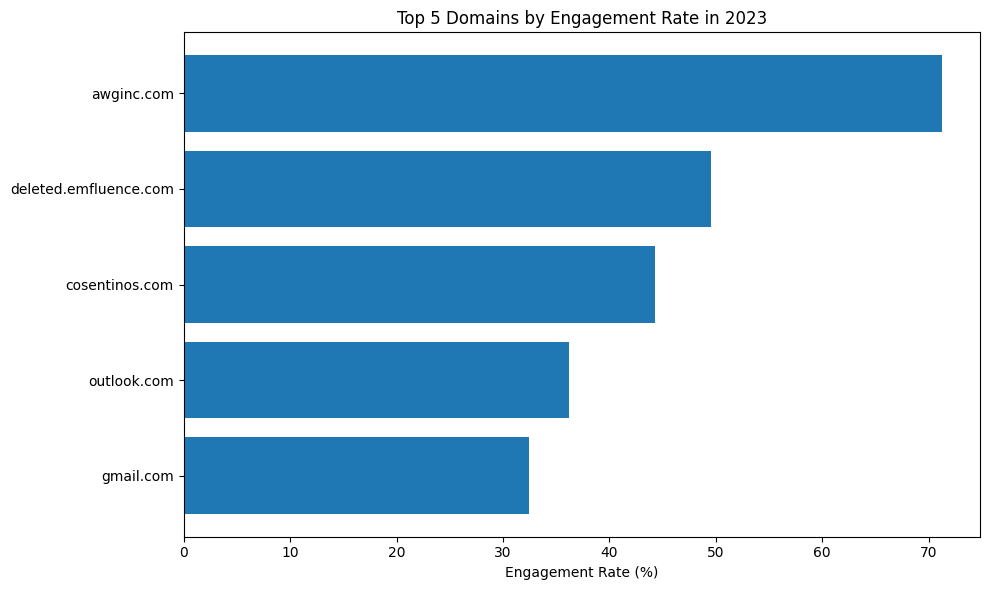

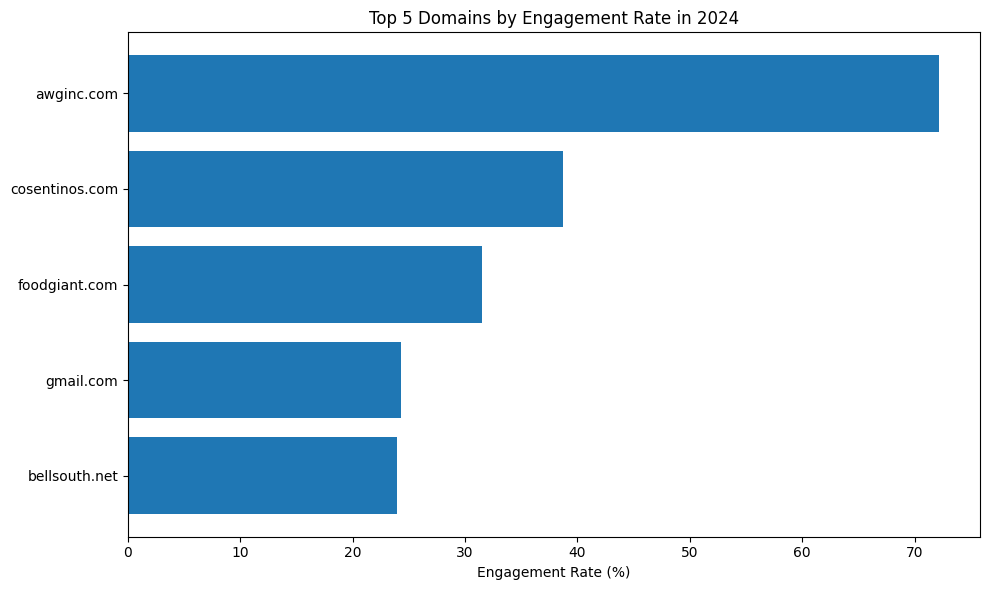

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "2023&2024_newdomain_merged.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year

grouped = df.groupby(["Domain", "Year"]).agg({
    "Sent": "sum",
    "Unique Views": "sum",
    "Unique Clicks": "sum",
    "Bounces": "sum"
}).reset_index()

grouped["Delivered"] = grouped["Sent"] - grouped["Bounces"]
grouped["Engagement Rate"] = ((grouped["Unique Views"] + grouped["Unique Clicks"]) / grouped["Delivered"]) * 100

top5_2023 = grouped[grouped["Year"] == 2023].nlargest(5, "Engagement Rate")
top5_2024 = grouped[grouped["Year"] == 2024].nlargest(5, "Engagement Rate")

def plot_top5_engagement(data, year):
    plt.figure(figsize=(10, 6))
    plt.barh(data["Domain"], data["Engagement Rate"])
    plt.xlabel("Engagement Rate (%)")
    plt.title(f"Top 5 Domains by Engagement Rate in {year}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_top5_engagement(top5_2023, 2023)
plot_top5_engagement(top5_2024, 2024)
